# The Solow Model with Human Capital

Imports and set magics:

In [4]:
import numpy as np
from scipy import optimize
import sympy as sm
from scipy import linalg
from types import SimpleNamespace
import pandas as pd 
import matplotlib.pyplot as plt
import ipywidgets 


# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# We import our own code from the ModelProject.py file
from modelproject import SolowModelClass 
#We import our model
model = SolowModelClass()



# Model description

**The solow model with human capital** 
 
The solow model investigates how a country grows over time and how different variables affects this growth. 

The "base-line" model that we will look at, will be an extended solow model, the solow model with human capital. 

In the solow model with human capital, there is an inclusion of human capital in the production function and accumulation of human capital by consumers. * 
 

This project will look at the variation with human capital and how the implemtation of human capital affects the growth. Firstly it will be assumed that the human capitala is equal to the countrys population and later we will change this by making the human capital a part of the total population. Finally, we wil see how the parameters $ \alpha$ , $ \phi$ and $\delta$ will affect the growth




. * "Introducing Advanced Macroeconomics, by H.J.Whitta-Jacobsen and P.B.Sørensen"

The Solow-model with Human capital is given as below, by the book "Introducing Advanced Macroeconomics, by H.J.Whitta- Jacobsen and P.B.Sørensen"

**The production function :**
$ Y_{t} = K_{t}^{\alpha} H_{t}^{\phi} (A_{t} L_{t})^{1-\alpha -\phi} $

**Accumulation of physical capital :**
$ K_{t+1} - K_{t} = s_{K} Y_{t} - \delta K_{t} $

**Accumulation of human capital :**
$ H_{t+1} - H_{t} = s_{H} Y_{t} - \delta H_{t} $

**Growth in labor :**
$ L_{t+1} = (1 + n) L_{t} $

**Growth in technology :** 
$ A_{t+1} = (1 + g) A_{t} $ 


*where we have*
## Variables 
$Y_t$ is the Production

$K_t$ is the  physical capital

$H_t$ is the human capital 

$A_t$ is the technology

$L_t$ is the labor 
## Parameters
$\alpha$ is the income share to physical capital

$\phi$ is the income share to human capital

$\delta$ is the depreciation rate

$n$ is the populaiton growth rate

$g$ is the productivity

$s_H$ is the savings rate in human capital

$s_K$ is the savings rate in physical capital


We can compute the variables as per effective worker variables: 
$$
\tilde{y_{t}}= \tilde{k_{t}}^{\alpha} \tilde{h_{t}}^{\phi} 
$$
$$
\tilde{k}_{t+1} = \frac{1}{(1+n)(1+g)} \left( s_{K} \tilde{y_{t}} + (1-\delta) \tilde{k_{t}} \right)
$$
$$ 
\tilde{h}_{t+1} = \frac{1}{(1+n)(1+g)} \left( s_{H} \tilde{y_{t}} + (1-\delta) \tilde{h_{t}} \right)
$$

The transition-equations can be found by substituting for y in the two latter equations

## Steady State

#### We will start by solving the steady states analytically

We will start by calculating the steady state values for $ h^* $ and $ k^*$

In [5]:

# We name our variables 
k = sm.symbols('k')
h = sm.symbols('h')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
s_K = sm.symbols('s_K')
s_H = sm.symbols('s_H')
g = sm.symbols('g')
n = sm.symbols('n')
phi = sm.symbols('phi')

In [6]:
# We call on the module from the SolowModelClass, to solve the steady state
model.SteadyStateValues_k(k,h,alpha,delta,s_K,s_H,g,n,phi)

((delta + g*n + g + n)/(s_K*(((delta + g*n + g + n)/(k**alpha*s_H))**(1/(phi - 1)))**phi))**(1/(alpha - 1))

In [7]:
model.SteadyStateValues_h(k,h,alpha,delta,s_K,s_H,g,n,phi)  

((delta + g*n + g + n)/(s_H*(((delta + g*n + g + n)/(h**phi*s_K))**(1/(alpha - 1)))**alpha))**(1/(phi - 1))

We can write these two expressions a bit nicer

$$
\tilde{k}^* = \left( \frac { s_K ^{1-\phi}  s_H^\phi} { n+ g + \delta + ng } \right) ^\frac{1}{1-\phi - \alpha}
$$
$$
\tilde{h}^* = \left( \frac { s_K ^\alpha  s_H^{1-\alpha}} { n+ g + \delta + ng } \right) ^\frac{1}{1-\phi - \alpha}
$$


 
 
 
 
 
 
 
 
 
 
 
 

 
 
 
 
 
 
 
 
 
 
 
 
 



We now have the the two Steady State equations for $h^*$ and $k^*$. 


Now we will calculate the steady state values for $k^*$ and $h^*$

In [8]:
# We define the two steady states:
k_tilde = ((s_K**(1-phi) * s_H**phi)/(n+g+delta +n*g))**(1/(1-phi-alpha))
h_tilde = ( (s_K**(alpha) * s_H**(1-alpha))/(n+g+delta +n*g))**(1/(1-phi-alpha))
        
# Now we turn them in to pyhton function, using sympy lambdify.
kss_function = sm.lambdify((alpha,phi,delta,n,g,s_K,s_H),k_tilde)
hss_function = sm.lambdify((alpha,phi,delta,n,g,s_K,s_H),h_tilde) 

print('The steady state value for k is',kss_function(0.333,0.333,0.02,0.014,0.016,0.25,0.129),
      'and the steady state value for h is',hss_function(0.333,0.333,0.02,0.014,0.016,0.25,0.129))


The steady state value for k is 63.15712297843114 and the steady state value for h is 32.58907545687048


We can now also derive the Nullclines which show respectively when $\Delta \tilde{h}=0$ and when $\Delta \tilde{k} =0$

The equations for the Nullclines are found in the book and they look as follows:
$$ \Delta \tilde{k} =0 \iff \tilde{h}=\left(\frac{{(n + g + \delta + n \cdot g)}}{{s_K}}\right)^{\frac{1}{{\phi}}} \cdot k_{\tilde{t}}^{\frac{{1 - \alpha}}{{\phi}}}
$$
$$
\Delta \tilde{h}=0 \iff \tilde{h}=\left(\frac{{s_H}}{{n + g + \delta + n \cdot g}}\right)^{\frac{1}{{1 - \phi}}} \cdot k_{\tilde{t}}^{\frac{{\alpha}}{{1 - \alpha}}}
$$

We have added a method that simulates these nullclines given our parameter values over a period of time to show the interception is the steady state level for the model as represented by the red not on the graphs.


ktilde in steady state: 63.1571229784311, htilde in steady state: 32.5890754568704


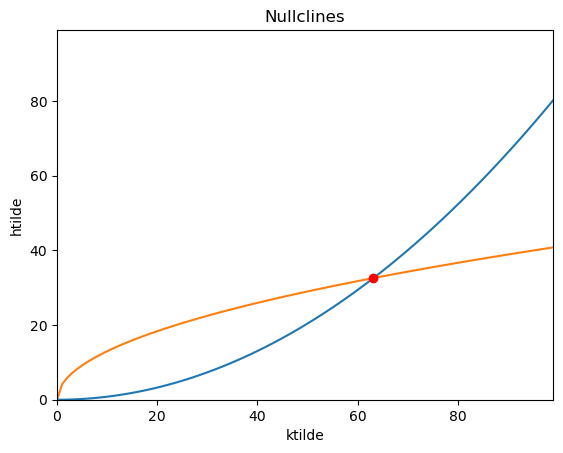

In [9]:
model.Nullclines(do_sim=True)

In [10]:

model.Nullclines2()

interactive(children=(FloatSlider(value=0.25, description='s_K', max=1.0, min=0.01, step=0.01), FloatSlider(va…

## Numerical solution

For our numerical solution we have chosen to create a simulation of our model and show the tilde variables convergence towards steady state:

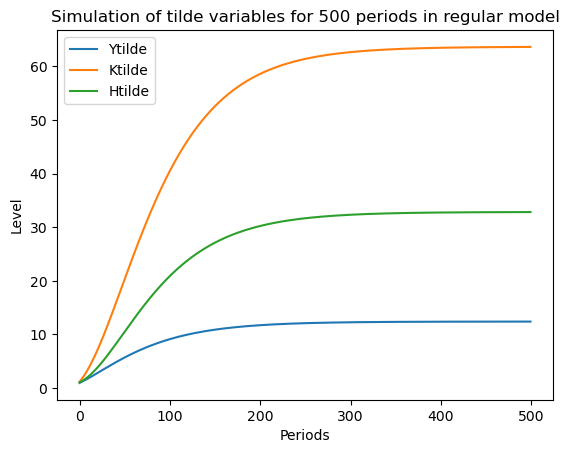

In [2]:
from modelproject import SimulationClass
simulation = SimulationClass()
simulation.simulate(periods=500)


The parameters used for the simulation are the following:
$$
\alpha = 1/3\\
\phi = 1/3\\
\delta = 0.02\\
n = 0.014\\
g = 0.016\\
s_K = 0.25\\
s_H = 0.129

$$
These parameters were taken from the books on which our model is based.
As we can clearly see that with these parameters it is taking us upwards of 500 periods to reach the expected steady state level.

# Further analysis

For further analysis the accumulation of capital in an economy and the convergence towards steady state levels. We will now simulate what would happen if half the economy's capital was destroyed at period 200.

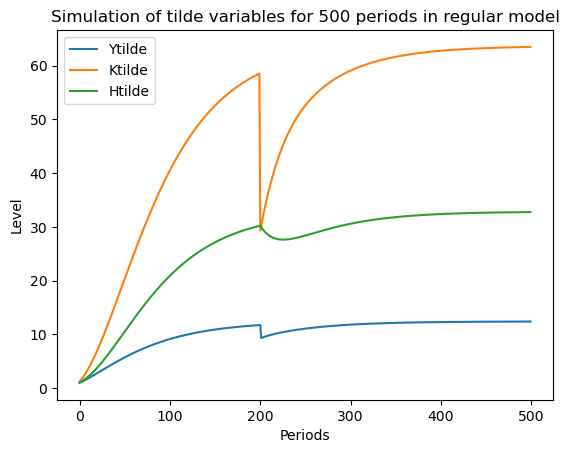

In [3]:
simulation.simulate(periods=500, destroy_period=200)          

As we can see, if the country were to lose half of their physical capital in period 200, it would not only affect the physical capital but also the human capital. This happens because of the cross effects between them as both are affected by a change in Y.

Lastly in our analysis we want to see how a change in the saving rates for both physical and human capital affect our simulation of capital accumulation

In [4]:
simulation.simulate(periods=500, interactive=True)

interactive(children=(FloatSlider(value=0.25, description='s_K', max=0.5, min=0.01, step=0.01), FloatSlider(va…

<function modelproject.SimulationClass._create_s_H_plot.<locals>.update_simulation(s_K, s_H)>

If we with the sliders try to increase either of the saving rates, we are going to see both steady state levels and growth path increases. Intuitively this comes from the cross effects between an increase in either types of capital.

As both are factors in the production function both will lead to an increase in Y, meaning that when you then take the saving rate of the other production factor the total amount of savings will automatically increase. We are however seeing decreasing marginal product for both, meaning that the distance between the two factors the less the more of a difference will we see in the cross effects.

# Conclusion

We have now gone over some of the main tools to analyze the Solow model with Human capital. We found that with the parameter values from the book, which have been found through empirical analysis, that there will be a convergence towards a steady state level of capital in the economy.

It is however important to realize that this convergence is only for the tilde adjusted per capita values. With technological progress in the economy, the total level of capital and output will converge to a steady growth path.

Other than that, we analyzed what would happen if the economy suddenly lost half of its physical capital during its convergence towards steady state. We saw that not only would the physical capital be affected, but also human capital and obviously output.

Lastly we tested what different savings rates would mean for the convergence. We saw that higher saving rates lead to higher levels of steady state.

It is however important to realize that, it is not an easy thing to change the savings rate in an economy. The population obviously need to consume a certain level to maintain a certain standard of living.

As it is with these types of models, there are a lot of things can we couldve analyzed deeper, for example it would be interesting to calcute the golden rule savings rate for different parameter values and compare that way. We chose to use the parameter values for USA from the book, but international comparison wouldve been interesting. Other than that it could also have been interesting to look at the convergence speed and calculated that, it wouldve given us a more definitive answer to many of our questions.

# Extension to the model

We will now add a tax ($\tau$) on capital

Our model can now be written as follow: 

$$
Y_{t} = K_{t}^{\alpha} H_{t}^{\phi} (A_{t} L_{t})^{1-\alpha -\phi}
$$


$$
K_{t+1}  = s_{K} Y_{t} + (1- \delta - \tau) K_{t}
$$

$$ 
H_{t+1} = \tau K_{t} + (1 - \delta) H_{t} 
$$

$$
L_{t+1} = (1 + n) L_{t}
$$

$$
A_{t+1} = (1 + g) A_{t}
$$ 

where,
$\tau $ is the tax on capital 


We can now compute the variables as per effective worker variables: 
$$
\tilde{y_{t}}= \tilde{k_{t}}^{\alpha} \tilde{h_{t}}^{\phi} 
$$
$$
\tilde{k}_{t+1} = \frac{1}{(1+n)(1+g)} \left( s_{K} \tilde{k_{t}}^{\alpha} \tilde{h_{t}}^{\phi} + (1-\delta- \tau) \tilde{k_{t}} \right)
$$
$$ 
\tilde{h}_{t+1} = \frac{1}{(1+n)(1+g)} \left( \tau \tilde{k_{t}} + (1-\delta) \tilde{h_{t}} \right)
$$


In [14]:

from modelproject import ExtensionClass
Extension = ExtensionClass()  

In [15]:
# We set the parameters
k = sm.symbols('k')
h = sm.symbols('h')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
tau = sm.symbols('tau')
s_K = sm.symbols('s_K')
g = sm.symbols('g')
n = sm.symbols('n')
phi = sm.symbols('phi')
y = k**alpha * h**phi



We will now calculate the steady state functions for k and h

In [16]:
Extension.steady_statek(alpha,phi,delta,n,g,s_K,tau)


((delta + g*n + g + n + tau)/(s_K*(k*tau/(delta + g*n + g + n))**phi))**(1/(alpha - 1))

In [17]:
Extension.steady_stateh(alpha,phi,delta,n,g,s_K,tau)

tau*((delta + g*n + g + n + tau)/(h**phi*s_K))**(1/(alpha - 1))/(delta + g*n + g + n)

We can reformulate these steady states to make them nicer and more readable

$$
\tilde{k}^* = \left(\frac{s_K}{\delta + \tau + n + g +ng} \right)^\frac{1}{1-\alpha-\phi} \left( \frac{\tau}{\delta + \tau + n +g +ng} \right) ^\frac{\phi}{1-\alpha - \phi}
$$
$$
\tilde{h}^* = \left(\frac{s_K}{\delta + \tau + n + g +ng} \right)^\frac{1}{1-\alpha-\phi} \left( \frac{\tau}{\delta + \tau + n +g +ng} \right) ^\frac{1-\alpha}{1-\alpha - \phi}
$$

Now we will claculate the steady state values: 

In [21]:
# We define the two stedy state-functions:
k_tilde = (s_K / (delta + tau + n + g + n*g)**(1/(1-alpha-phi))) * (tau/(delta + n + g + n*g))**((phi)/(1-alpha-phi))
h_tilde = (s_K / (delta + tau + n + g + n*g)**(1/(1-alpha-phi))) * (tau/(delta + n + g + n*g))**((1-alpha)/(1-alpha-phi))

# now we turn them in to pyhton function, using sympy lambdify
kss_function = sm.lambdify((alpha,phi,delta,n,g,tau,s_K),k_tilde)
hss_function = sm.lambdify((alpha,phi,delta,n,g,tau,s_K),h_tilde)

# Now we call on the functions, to get the steady state values for k and h
kss = kss_function(0.33,0.33,0.02,0.014,0.016,0.25,0.2)
hss = hss_function(0.33,0.33,0.02,0.014,0.016,0.25,0.2)

print ('The steady state value for k is',kss,'and the steady state value for h is',hss)

The steady state value for k is 32.69513502733269 and the steady state value for h is 162.7465705008197
